# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

In [15]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("C:/Users/yurid/Downloads/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [16]:
df['Income'] = df['Income'].str.replace('.',   '', regex= False).str.replace(',', '.', regex = False).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [17]:
#seu código
df.isnull().sum()


Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

Conforme o exposto acima, a coluna Age (idade) tem 34 valores nulos. Já que o conjunto de dados possui apenas 164 entradas, excluir as linhas de valor nulo não faria sentido. Assim, caberia substituir pela média ou mediana dos valores. Para isso, vamos verificar os valores de média e mediana. Quanto mais próximos forem, mais próxima da normal é a distribuição dos dados.

In [18]:
media = df['Age'].mean()
mediana = df['Age'].mean()
print('Média: ', media, ' ' , 'Mediana: ', mediana)

Média:  37.50769230769231   Mediana:  37.50769230769231


Como média e mediana são iguais, substituiremos pelo valor mais próximo de ambas, 38, pois não existem idades decimais. Depois, vamos transformar a coluna de float para int

In [19]:
df['Age'] = df['Age'].fillna(38)
df['Age'] = df['Age'].astype(int)
df.isnull().sum()



Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [20]:
for coluna in 'Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score':
    valores_unicos = df[coluna].unique()

    print('Valores únicos da variável', coluna , ":", valores_unicos)

Valores únicos da variável Gender : ['Female' 'Male']
Valores únicos da variável Education : ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Valores únicos da variável Marital Status : ['Single' 'Married']
Valores únicos da variável Home Ownership : ['Rented' 'Owned']
Valores únicos da variável Credit Score : ['High' 'Average' 'Low']


Diante disso, todas as células estão corretamente digitadas

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [21]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.609756,83765.243902,0.652439
std,7.564457,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,38.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [22]:
fig =  make_subplots(rows=1, cols= 2)
fig.add_trace(go.Histogram(x=df['Age'],
                           name='Idade',
                           marker_color = 'aqua'),
              row = 1,
              col = 1)
fig.add_trace(go.Box(y=df['Age'],
                     name='Idade',
                     marker_color = 'royalblue',
                     boxpoints='all'),
              row = 1,
              col = 2)
fig.update_layout(
    title_text = 'Distribuição da variável Idade',
    xaxis_title = 'Idade',
    bargap=0.2,
    showlegend=False,
)

fig.show()


Em ambos os casos para idade, vamos uma distribuição próxima da normal com mais valores em torno da média e da mediana em virtude da substituição realizada aos valores nulos.

In [23]:
fig =  make_subplots(rows=1, cols= 2)
fig.add_trace(go.Histogram(x=df['Number of Children'],
                           marker_color = 'purple'),
              row = 1,
              col = 1)
fig.add_trace(go.Box(y=df['Number of Children'],
                     name='Número de Crianças',
                     marker_color = 'pink',
                     boxpoints='all'),
              row = 1,
              col = 2)
fig.update_layout(
    title_text = 'Distribuição da variável Número de Crianças',
    xaxis_title = 'Número de Crianças',
    bargap=0.2,
    showlegend=False,
)


Aqui, vemos que os dados de número de crianças se concentram em 0, com menor ênfase para 1 e 2 e poucos com 3, mas isso não necessariamente indica outliers.

In [24]:
fig =  make_subplots(rows=1, cols= 2)
fig.add_trace(go.Histogram(x=df['Income'],
                           marker_color = 'tomato',
                           ),
              row = 1,
              col = 1)
fig.add_trace(go.Box(y=df['Income'],
                     name='Renda',
                     marker_color = 'orange',
                     boxpoints='all'),
              row = 1,
              col = 2)
fig.update_layout(
    title_text = 'Distribuição da variável Renda',
    xaxis_title = 'Renda',
    bargap=0.2,
    showlegend=False,
)

Conforme os gráficos, a variável Renda tem distribuição próxima da normal

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [26]:
import plotly.io as pio
pio.renderers.default = "browser"
fig =  make_subplots(rows=1, cols= 5)


fig.add_trace(go.Histogram(x=df['Gender'],
                           name= 'Gênero',
                           marker_color = 'olivedrab',
                           histnorm='percent',
                           texttemplate='%{y:.2f}%',
                           textposition = 'outside'),
              row = 1,
              col = 1)
fig.add_trace(go.Histogram(x=df['Education'],
                           name = 'Grau de Escolaridade',
                           marker_color = 'lime',
                           histnorm='percent',
                           texttemplate='%{y:.2f}%',
                           textposition = 'outside'),
              row = 1,
              col = 2)
fig.add_trace(go.Histogram(x=df['Marital Status'],
                           name= 'Estado Civil',
                           marker_color = 'forestgreen',
                           histnorm='percent',
                           texttemplate='%{y:.2f}%',
                           textposition = 'outside'),
              row = 1,
              col = 3)
fig.add_trace(go.Histogram(x=df['Home Ownership'],
                           name = 'Casa Própria',
                           marker_color = 'green',
                           histnorm='percent',
                           texttemplate='%{y:.2f}%',
                           textposition = 'outside'),
              row = 1,
              col = 4)
fig.add_trace(go.Histogram(x=df['Credit Score'],
                           name = 'Score',
                           marker_color = 'darkgreen',
                           histnorm='percent',
                           texttemplate='%{y:.2f}%',
                           textposition = 'outside'),
              row = 1,
              col = 5)
fig.update_layout(
    title_text = 'Distribuição das variáveis categóricas',
    legend_title = 'Variável',
    bargap=0.2
)

Diante dos gráficos, vemos que as porcentagens em relação a gênero estão quase equivalentes, com 52.44% de mulheres contra 47.56% de homens. No que tange ao grau de escolaridade, os bacharéis lideram com 25.61%, com o grau de associado em último lugar com 15.24%. Por sua vez, o estado civil se comporta de forma similar ao gênero, com porcentagens semelhantes inclusive, mas com maioria de casados em detrimento de solteiros. Já quando se trata da variável casa própria, aqueles que detém imóvel próprio disparam em relação àqueles com imóvel alugado sob uma diferença de 35% aproximadamente. Por fim, o Score alto é líder no conjunto de dados, sendo disparado o mais alto em relação a médio e baixo, com 47% acima de médio e quase 60% acima de baixo.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

A única coluna que pode ter outliers considerados é a do número de filhos, que possui 5 dados fora do padrão. Todavia, em razão do baixo número de linhas do conjunto de dados analisados, convém mantê-los para futuras análises.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [27]:
solteiros = pd.DataFrame(df[df['Marital Status'] == 'Single'])
casados = pd.DataFrame(df[df['Marital Status'] == 'Married'])
solteiros_mean = (solteiros['Age'].mean())
casados_mean = (casados['Age'].mean())
graf = pd.DataFrame({'Estado Civil': ['Casado', 'Solteiro'],
                    'Idade Média': [casados_mean,solteiros_mean]})
fig = go.Figure()
fig.add_trace(go.Bar(x = graf['Estado Civil'],
                     y = graf['Idade Média'],
                     textposition='outside',
                     texttemplate = '%{y:.2f}',
                     marker_color = 'yellow'))

fig.update_layout(yaxis_title = 'Idade Média',
                  xaxis_title = 'Estado Civil',
                  title_text = 'Relação idade média x estado civil',
                  yaxis_range = [0,50],
                  width = 600)
fig.show()


Da análise bivariada entre estado civil e idade, foi calculada a média da idade dos clientes para cada um dos estados civis propostos no conjunto de dados, de forma a entender se há alguma relação entre essas variáveis. Dessa forma, foi possível notar que a idade média das pessoas casadas é superior à das pessoas solteiras, conforme o gráfico apresentado acima.

In [28]:
low = df[df['Credit Score'] == 'Low']
high = df[df['Credit Score'] == 'High']
average = df[df['Credit Score'] == 'Average']

fig=go.Figure()
fig.add_trace(go.Histogram(x=high['Education'],
              name = 'Alto',
              marker_color = 'yellow'))
fig.add_trace(go.Histogram(x=average['Education'],
              name= 'Médio',
              marker_color = 'orange'))
fig.add_trace(go.Histogram(x=low['Education'],
              name = 'Baixo',
              marker_color = 'red'))
fig.update_layout(title_text = 'Relação entre grau de escolaridade e score de crédito',
                  legend_title = 'Score')
fig.show()

Do gráfico, temos que indivíduos com graus mais altos de escolaridade (mestrado e doutorado) tendem a apresentar scores mais altos. Os bacharéis, por sua vez, apresentam alguns scores médios, que mal aparecem nos anteriores. Além disso, graus mais baixos tem mais scores médios e baixos associados.

In [29]:
dados = {}
medias = {}
for idade in df['Age'].unique():
   df_filtrado = df[df['Age']==idade]
   dados[idade] = df_filtrado

for age in df['Age'].unique():
    media = dados[age]['Income'].mean()
    medias[age] = media

graf = pd.DataFrame(list(medias.items()), columns = ['Idade', 'Renda Média'])
graf = graf.sort_values(by='Idade').reset_index(drop=True)

fig = px.scatter(graf,
                 x= 'Idade',
                 y= 'Renda Média',
                 trendline='ols',
                 title = 'Tendência da renda média em função da idade'
                 )
fig.show()

Conforme a linha de tendência proposta pelo gráfico acima, os salários aumentam com o aumento da idade.

In [30]:
mean_low = low['Income'].mean()
mean_high = high['Income'].mean()
mean_average = average['Income'].mean()

graf_score_renda = pd.DataFrame({'Score': ['Baixo', 'Médio', 'Alto'],
                                 'Média Salarial': [mean_low, mean_average, mean_high]})

fig = go.Figure()
fig.add_trace(go.Bar(x=graf_score_renda['Score'],
                     y=graf_score_renda['Média Salarial'],
                     marker_color = 'brown'))
fig.update_layout(title_text ='Relação entre score e renda',
                  xaxis_title = 'Score',
                  yaxis_title = 'Renda Média',
                  width = 600)
fig.show()

Dada a disposição do gráfico acima, Scores mais altor tem relação com maiores rendas.

In [31]:
fig = go.Figure()

fig.add_traces(go.Histogram(x=low['Home Ownership'],
                            name = 'Baixo',
                            marker_color = 'crimson'))

fig.add_traces(go.Histogram(x=average['Home Ownership'],
                            name ='Médio',
                            marker_color = 'fuchsia'))

fig.add_traces(go.Histogram(x=high['Home Ownership'],
                            name='Alto',
                            marker_color = 'plum'))

fig.update_layout(title_text = 'Relação entre casa própria e score de crédito',
                  legend_title = 'Score')

fig.show()

Dados os gráficos acima, temos que scores mais altos estão relacionados com a posse de imóveis, enquanto scores baixos e médios aparecem mais para indivíduos com imóveis alugados.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

- Qual a relação entre gênero e grau de escolaridade?
- Qual a relação entre grau de escolaridade e renda?
- Qual a relação entre gênero e score?

In [32]:
men = df[df['Gender'] == 'Male']
women = df[df['Gender'] == 'Female']

fig = go.Figure()

fig.add_traces(go.Histogram(x=men['Education'],
                            name = 'Masculino',
                            marker_color = 'navajowhite'))

fig.add_traces(go.Histogram(x=women['Education'],
                            name='Feminino',
                            marker_color = 'peru'))

fig.update_layout(title_text = 'Relação entre grau de escolaridade e gênero',
                  legend_title = 'Gênero')
fig.show()

Do gráfico, temos que mais pessoas do gênero feminino tendem ao bacharelado e ao doutorado, enquanto pessoas do gênero masculino tendem ao grau de associado ou ao mestrado. Já o diploma de ensino médio é equivalente para ambos os gêneros.

In [33]:
graus = {}
dados = {}
for grau in df['Education'].unique():
   df_filtrado = df[df['Education']==grau]
   dados[grau] = df_filtrado

for degree in df['Education'].unique():
    media = dados[degree]['Income'].mean()
    graus[degree] = media

grafico = pd.DataFrame(list(graus.items()), columns = ['Grau de Escolaridade', 'Renda Média'])

fig = go.Figure()

fig.add_traces(go.Bar(x=grafico['Grau de Escolaridade'],
                      y= grafico['Renda Média'],
                      marker_color = 'orchid'))

fig.update_layout(title_text = 'Relação entre grau de escolaridade e renda',
                  xaxis_title = 'Grau de Escolaridade',
                  yaxis_title = 'Renda Média')


Diante do gráfico, temos que, exceto pela discrepância entre mestrado e doutorado, quanto maior o grau, maior a renda média associada.

In [34]:
fig = go.Figure()

fig.add_traces(go.Histogram(x=low['Gender'],
                            name = 'Baixo',
                            marker_color='palegreen'))
fig.add_traces(go.Histogram(x=average['Gender'],
                            name='Médio',
                            marker_color='greenyellow'))
fig.add_traces(go.Histogram(x=high['Gender'],
                            name='Alto',
                            marker_color='lime'))

fig.update_layout(title_text = 'Relação entre gênero e score',
                  legend_title = 'Score')

Diante do exposto, temos que homens tendem a scores médios e altos, enquanto algumas mulheres apresentam score mais baixo.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [35]:
correl_inicial = df.select_dtypes(include=['number']).corr()
fig = go.Figure()
fig.add_traces(go.Heatmap(z=correl_inicial,
                          x=correl_inicial.index,
                          y= correl_inicial.columns,
                          texttemplate='%{z}',
                          colorscale = 'Viridis'))
fig.update_layout(title_text="Correlação variáveis numéricas")

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Idade e renda tem alta correlação conforme o plot acima, de 61,99%. Faz sentido levando em conta a análise bivariada, que mostra que a renda aumenta com a idade, o que é reforçado pela correlação positiva entre as variáveis.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [36]:
from sklearn.preprocessing import LabelEncoder
categ = df.select_dtypes(include=['object'])
label = LabelEncoder()

for coluna in categ:
    df[coluna] = label.fit_transform(df[coluna])




df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    int64  
 2   Income              164 non-null    float64
 3   Education           164 non-null    int64  
 4   Marital Status      164 non-null    int64  
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    int64  
 7   Credit Score        164 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 10.4 KB


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [37]:
#seu código aqui
correl_categ = df.corr()
fig = go.Figure()

fig.add_traces(go.Heatmap(z=correl_categ,
                          y=correl_categ.index,
                          x=correl_categ.columns,
                          texttemplate = '%{z}',
                          colorscale = 'Viridis'))

No plot acima, vemos uma alta correlação negativa para:
- Posse de imóveis e idade
- Estado civil e idade
- Número de filhos e gênero
- Estado civil e renda
- Posse de imóveis e renda
- Número de filhos e estado civil

Além disso, temos altas correlações positivas em:
- Gênero e renda;
- Idade e renda;
- Educação e renda;
- Estado civil e posse de imóveis.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [38]:
from sklearn.model_selection import train_test_split
x= df.drop('Credit Score', axis = 1)
y = df[['Credit Score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

dataset = {'xtrain': x_train, 'ytrain': y_train, 'xtest': x_test, 'ytest': y_test}

for nome, variavel in dataset.items():
    print(f"Tamanho de {nome}: {variavel.shape}")


Tamanho de xtrain: (123, 7)
Tamanho de ytrain: (123, 1)
Tamanho de xtest: (41, 7)
Tamanho de ytest: (41, 1)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score'>

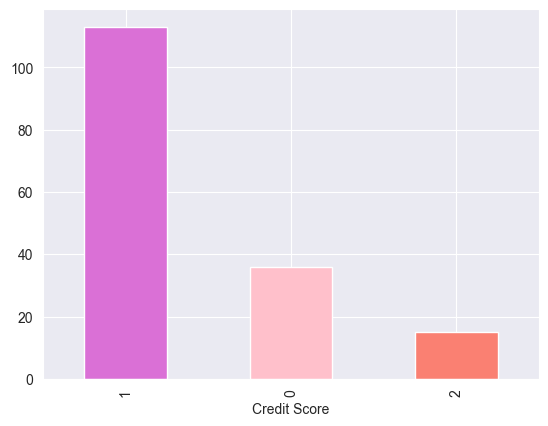

In [39]:
score_counts = df['Credit Score'].value_counts()

score_counts.plot(kind='bar', color = ['orchid', 'pink', 'salmon'])


Pelo gráfico, vemos que a coluna não é balanceada

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

xtrain_bal, ytrain_bal = smote.fit_resample(x_train, y_train)

print('Distribuição das classes após o balanceamento:', ytrain_bal.value_counts())

Distribuição das classes após o balanceamento: Credit Score
0               84
1               84
2               84
Name: count, dtype: int64


In [41]:
x_test.to_csv('C:/Users/yurid/Downloads/x_text.csv', index = False)
y_test.to_csv('C:/Users/yurid/Downloads/y_test.csv', index = False)
xtrain_bal.to_csv('C:/Users/yurid/Downloads/xtrain.csv', index = False)
ytrain_bal.to_csv('C:/Users/yurid/Downloads/ytrain.csv', index = False)